In [1]:
# Set root directory as working directory
import os
os.chdir('../')

# Matrix aggregation

The original matrix has 85 age groups (0-84 y.o.). We reduce this number to 10 groups, matching the ones from the incidence data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ages = np.genfromtxt('data/raw/Spain_country_level_age_distribution_85.csv', delimiter=',')
matrix = np.genfromtxt('data/raw/Spain_country_level_M_overall_contact_matrix_85.csv', delimiter=',')

In [3]:
# total number of contacts between individuals of age i and individuals of age j
ages = ages[:, 1]
matrix = (matrix.T * ages).T

In [4]:
# Group in brackets of 10
matrix_agg = np.zeros((9,9))
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        matrix_agg[i//10,j//10] += matrix[i][j]



In [5]:
ages_agg = np.pad(ages,(0,5)).reshape(-1, 10).sum(axis=1)

In [6]:
# Re-normalize
new_matrix = (matrix_agg.T / ages_agg).T

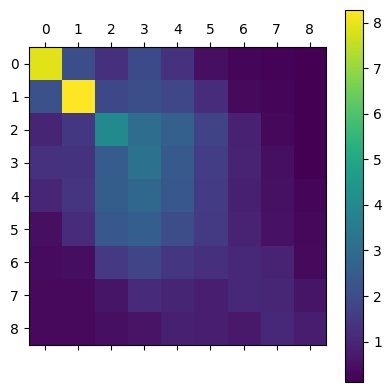

In [7]:
plt.matshow(new_matrix)
plt.colorbar()
plt.show()

In [8]:
np.savetxt('data/age_groups_Spain.csv', ages_agg, delimiter=',')
np.savetxt('data/contact_matrix_Spain.csv', new_matrix, delimiter=',')